In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
TADPOLE_dataLocation = '/Users/noxtoby/Documents/Research/TADPOLE2017/Data/tadpole_challenge'
df_D1_D2 = pd.read_csv(os.path.join(TADPOLE_dataLocation,'TADPOLE_D1_D2.csv'),low_memory=False).sort_values(['RID','EXAMDATE'])
df_D3 = pd.read_csv(os.path.join(TADPOLE_dataLocation,'TADPOLE_D3.csv'),low_memory=False).sort_values(['RID','EXAMDATE'])
df_D2 = df_D1_D2.loc[df_D1_D2.D2==1].copy()

In [3]:
#* Some potentially-useful dates pertaining to the ADNI study
startOfADNI1  = '2005-07-01'
startOfADNIGO = '2010-04-01'
startOfADNI2  = '2011-01-01'
endOfADNI1    = '2011-06-30'
endOfADNIGO   = '2012-10-31'
startOfADNI3  = '2016-10-01'
endOfADNI2    = '2017-10-31'
endOfADNI3    = '2021-10-31'
daysInAYear = 365.25

In [4]:
RID = df_D1_D2.RID
RID_u = RID.unique()

In [5]:
df_numbers = pd.DataFrame({'RID':RID_u})

In [6]:
for RID_k in df_numbers.RID:
    k = np.where(RID_k==df_numbers.RID)[0]
    rowz = df_D1_D2.RID==RID_k
    #* Number of data rows per individual
    nVisits = sum(rowz)
    df_numbers.loc[k,'nVisits'] = nVisits
    #* Number of imaging data rows per individual
    nVisits_imaging = sum(rowz & ~(np.isnan(df_D1_D2.Hippocampus)))
    df_numbers.loc[k,'nVisits-Imaging'] = nVisits_imaging
    #* Number of FDG-PET data rows per individual
    nVisits = sum(rowz & ~(np.isnan(df_D1_D2.FDG)))
    df_numbers.loc[k,'nVisits-FDG'] = nVisits
    #* Number of PiB-PET data rows per individual
    nVisits = sum(rowz & ~(np.isnan(df_D1_D2.PIB)))
    df_numbers.loc[k,'nVisits-PIB'] = nVisits
    #* Number of AV45 data rows per individual
    nVisits = sum(rowz & ~(np.isnan(df_D1_D2.AV45)))
    df_numbers.loc[k,'nVisits-AV45'] = nVisits
    #* Number of CSF data rows per individual
    nVisits = sum(rowz & ~(df_D1_D2.ABETA_UPENNBIOMK9_04_19_17.isnull()))
    df_numbers.loc[k,'nVisits-ABETA'] = nVisits
    #* Number of Cog data rows per individual
    nVisits = sum(rowz & ~(np.isnan(df_D1_D2.MMSE)))
    df_numbers.loc[k,'nVisits-Cog'] = nVisits


In [7]:
# Might speed up the calculation above if I use this smaller df instead of df_D1_D2
df = pd.concat([df_D1_D2['RID'],df_D1_D2[['Hippocampus','MMSE','ABETA_UPENNBIOMK9_04_19_17','PIB','FDG','AV45']].isnull()],axis=1)

In [8]:
df_numbers.head()

,RID,nVisits,nVisits-Imaging,nVisits-FDG,nVisits-PIB,nVisits-AV45,nVisits-ABETA,nVisits-Cog
0,2,13.0,1.0,2.0,0.0,0.0,13.0,9.0
1,3,5.0,4.0,4.0,0.0,0.0,5.0,4.0
2,4,6.0,5.0,0.0,0.0,0.0,6.0,5.0
3,5,7.0,5.0,5.0,0.0,0.0,7.0,5.0
4,6,7.0,5.0,0.0,0.0,0.0,7.0,6.0


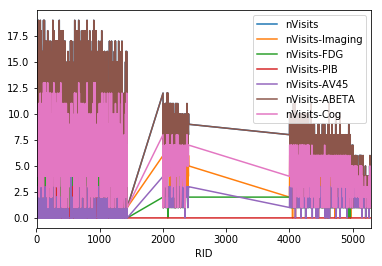

In [9]:
df_numbers.plot(x='RID')

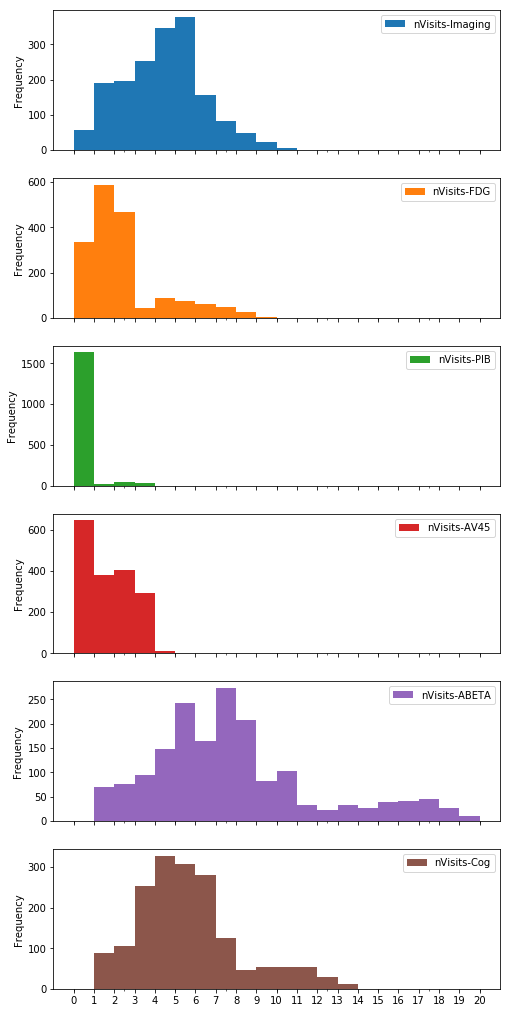

In [10]:
axe = df_numbers.plot(x='RID',y=['nVisits-Imaging','nVisits-FDG','nVisits-PIB','nVisits-AV45','nVisits-ABETA','nVisits-Cog'],
               kind='hist',subplots=True,figsize=(8,18),bins=range(21),xticks=range(21))